In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_train = pd.read_csv("Train.csv")
raw_test = pd.read_csv("Test.csv")

In [3]:
raw_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
raw_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
raw_test['source'] = 'test'
raw_train['source'] = 'train'

In [6]:
    df = pd.concat([raw_train, raw_test])
    df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [7]:
print(df.shape)
print(raw_train.shape)
print(raw_test.shape)

(14204, 13)
(8523, 13)
(5681, 12)


In [8]:
df.isnull().sum() / df.shape[0] * 100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

In [9]:
df.Item_Weight.head(10)

0     9.300
1     5.920
2    17.500
3    19.200
4     8.930
5    10.395
6    13.650
7       NaN
8    16.200
9    19.200
Name: Item_Weight, dtype: float64

In [10]:
df.groupby("Item_Identifier")['Item_Weight'].unique()

Item_Identifier
DRA12     [11.6, nan]
DRA24    [19.35, nan]
DRA59     [8.27, nan]
DRB01     [7.39, nan]
DRB13    [6.115, nan]
             ...     
NCZ30     [6.59, nan]
NCZ41    [19.85, nan]
NCZ42     [10.5, nan]
NCZ53      [9.6, nan]
NCZ54    [14.65, nan]
Name: Item_Weight, Length: 1559, dtype: object

In [11]:
item_weight_dict = dict(df.groupby("Item_Identifier")['Item_Weight'].unique())

In [12]:
for key, value in item_weight_dict.items():
    if type(value) == np.ndarray:
        item_weight_dict[key] = value[0] if value[0] == value[0] else value[1]

In [13]:
df.Item_Weight = df['Item_Identifier'].map(item_weight_dict)

In [14]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [15]:
df.groupby("Outlet_Identifier")['Outlet_Size'].unique()

Outlet_Identifier
OUT010       [nan]
OUT013      [High]
OUT017       [nan]
OUT018    [Medium]
OUT019     [Small]
OUT027    [Medium]
OUT035     [Small]
OUT045       [nan]
OUT046     [Small]
OUT049    [Medium]
Name: Outlet_Size, dtype: object

In [16]:
df[df.Outlet_Identifier.isin(['OUT010', 'OUT017', 'OUT045'])]['Outlet_Size'].notnull().sum()

0

This Show all the stores ('OUT010', 'OUT017', 'OUT045') dont have the Outlet_Size value. Lets see if we can find it any other way.

In [17]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [18]:
df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [19]:
df.groupby("Outlet_Identifier")['Outlet_Type'].unique()

Outlet_Identifier
OUT010        [Grocery Store]
OUT013    [Supermarket Type1]
OUT017    [Supermarket Type1]
OUT018    [Supermarket Type2]
OUT019        [Grocery Store]
OUT027    [Supermarket Type3]
OUT035    [Supermarket Type1]
OUT045    [Supermarket Type1]
OUT046    [Supermarket Type1]
OUT049    [Supermarket Type1]
Name: Outlet_Type, dtype: object

We can see that OUT010 is a grocery store implying it would be a small store.
For Type 2 only medium values are present. However for type 1 mixed values are present so we will take the most occuring value i.e. medium.
we can take OUT017 and OUT045 as medium

In [20]:
df.loc[df.Outlet_Identifier == 'OUT010', 'Outlet_Size'] = 'Small'
df.loc[df.Outlet_Identifier.isin(['OUT017', 'OUT045']), 'Outlet_Size'] = 'Medium'

In [21]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

We have successfully delt with null values at this point.

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,train


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [25]:
categorical_columns = df.select_dtypes(include=object).columns
numerical_columns = df.select_dtypes(exclude=object).columns

In [26]:
categorical_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')

In [27]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.065953,141.004977,1997.830681,2181.288914
std,4.651716,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


We have 0 values in visibility and thats not possible.

In [28]:
df.Item_Visibility.value_counts()

0.000000    879
0.076792      3
0.077169      3
0.076841      3
0.076975      3
           ... 
0.044503      1
0.030933      1
0.059281      1
0.019228      1
0.031007      1
Name: Item_Visibility, Length: 13006, dtype: int64

There are a lot of 0 values in the data. We need to replace them with other value. Let's start by checking visibility of the same product in different stores.

In [29]:
identifier_visibility_dict = dict(df.groupby("Item_Identifier")['Item_Visibility'].unique())
identifier_visibility_dict

{'DRA12': array([0.04117751, 0.        , 0.04091182, 0.04111269, 0.06853504,
        0.0409459 , 0.04074762, 0.04100956]),
 'DRA24': array([0.04015409, 0.06990919, 0.06683168, 0.03973488, 0.03992069,
        0.03999031, 0.03989501, 0.04000921, 0.04009089, 0.03992824]),
 'DRA59': array([0.12792793, 0.12812682, 0.12782147, 0.        , 0.12730843,
        0.22398529, 0.12844906, 0.21412513, 0.12818737, 0.12790374]),
 'DRB01': array([0.08236724, 0.08217095, 0.08184114, 0.14399055, 0.08270456,
        0.08257439, 0.08223938, 0.        ]),
 'DRB13': array([0.00708418, 0.00704301, 0.01179078, 0.00703848, 0.00705529,
        0.00705863, 0.00707304, 0.        , 0.00704434]),
 'DRB24': array([0.02060922, 0.02057333, 0.02069362, 0.02061896, 0.02057723,
        0.02047758, 0.0205601 , 0.02066105]),
 'DRB25': array([0.06944659, 0.06912336, 0.06940192, 0.06974267, 0.11626133,
        0.06985262, 0.06956771, 0.06945972, 0.06960059, 0.12161501]),
 'DRB48': array([0.02483281, 0.02473313, 0.        , 0.

Only in some stores the visibilty is 0. We can take the mean of the visibility of a product in all stores and use it to fill the 0 values. This is a much precise approach in filling these values rather then taking the mean of the whole column. Since this will not result in a peak at any value. Other wise over 800 of our products would have the same value.

In [30]:
for key, value in identifier_visibility_dict.items():
    identifier_visibility_dict[key] = np.mean(value)

In [31]:
df.loc[df.Item_Visibility == 0.0, 'Item_Visibility'] = df.loc[df.Item_Visibility == 0.0, 'Item_Identifier'].map(identifier_visibility_dict)

In [32]:
df.Item_Visibility.value_counts()

0.091410    6
0.024596    4
0.012157    4
0.120834    3
0.052977    3
           ..
0.011172    1
0.044900    1
0.031293    1
0.125583    1
0.031007    1
Name: Item_Visibility, Length: 13688, dtype: int64

The dataset has an Outlet_Establishment_Year column, a more intutuive column would be age of the outlet sote lets add that and remove this.

In [33]:
df['Outlet_Establishment_Year'] = 2019 - df['Outlet_Establishment_Year']

The fat content type also has a lot of non-unqiue columns

In [34]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [35]:
fat_dict = {
    'Low Fat': 'Low',
    'Regular': 'Reg',
    'low fat': 'Low',
    'LF': 'Low',
    'reg': 'Reg'
}

df.Item_Fat_Content = df.Item_Fat_Content.map(fat_dict)
df.Item_Fat_Content.unique()

array(['Low', 'Reg'], dtype=object)

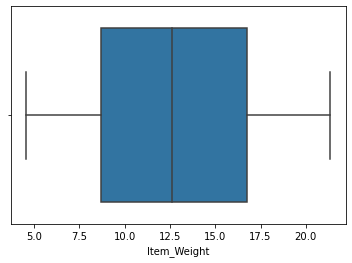

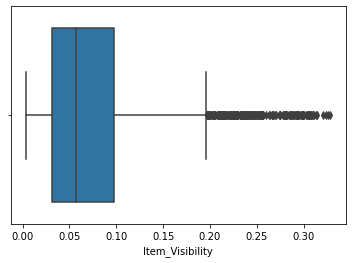

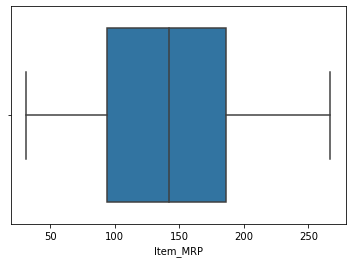

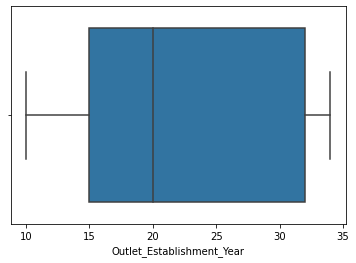

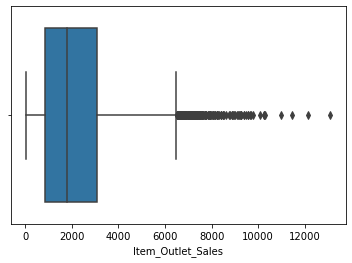

In [36]:
for column in numerical_columns:
    plt.figure()
    sns.boxplot(x=df[column])
plt.show()

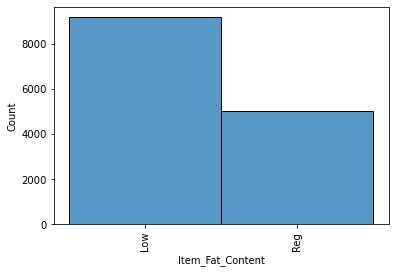

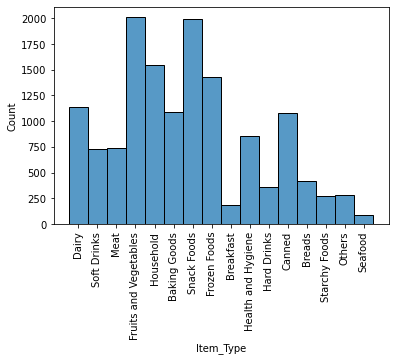

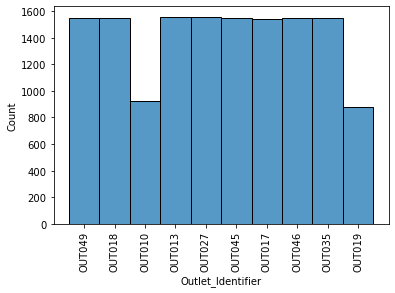

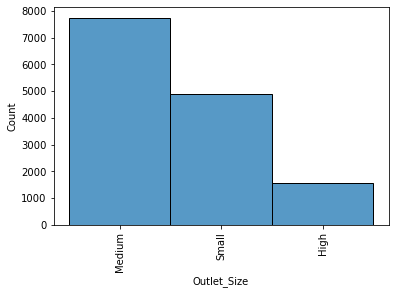

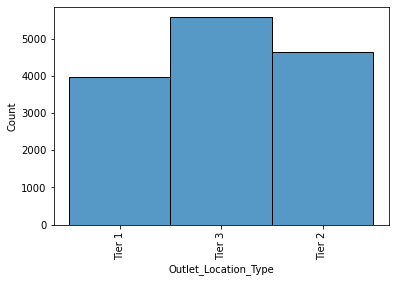

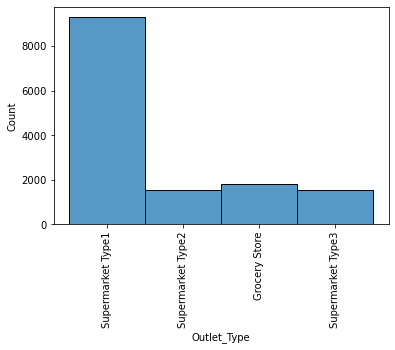

In [37]:
for column in categorical_columns:
    if(column in ('Item_Identifier','source')):
        continue
    plt.figure()
    plt.xticks(rotation='vertical')
    sns.histplot(x=df[column])
plt.show()

In [38]:
numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

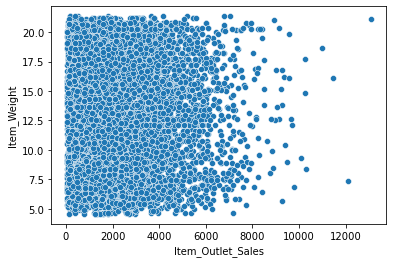

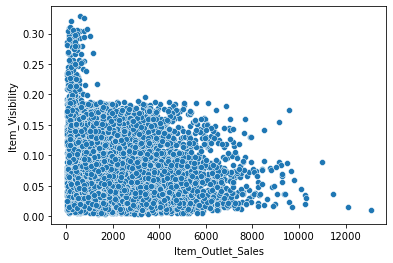

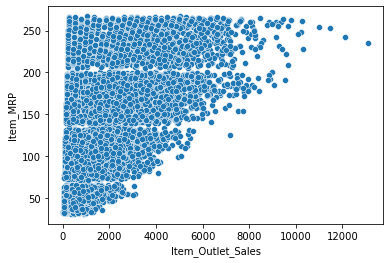

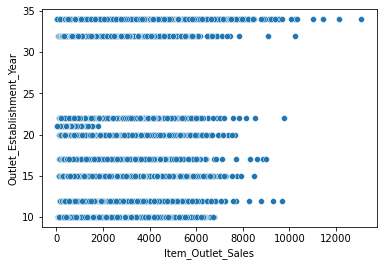

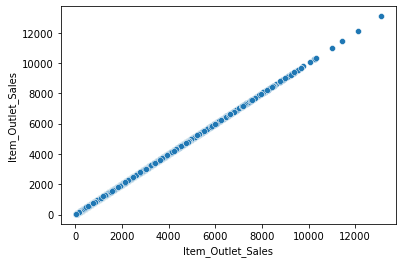

In [39]:
for column in numerical_columns:
    plt.figure()
    sns.scatterplot(x='Item_Outlet_Sales', y=column, data=df)
plt.show()

This is evident that goods with high visibility have low sales. Maybe the store is placing them forward to increase their chances of sale since they are already underselling. Other goods with good outlet sale are already selling and dont need any more attention thus the store does not bother changing them.

Another point is Item_MRP, Goods with high mrp are selliing more then the ones with less mrp.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_MRP'>

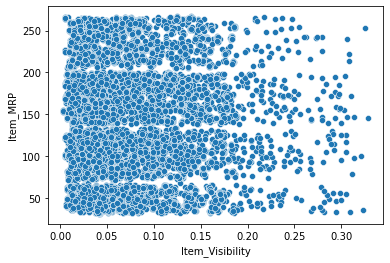

In [40]:
sns.scatterplot(x='Item_Visibility', y='Item_MRP', data=df)

In [41]:
df.Item_Identifier.value_counts()

FDQ04    10
FDH52    10
FDU33    10
NCE06    10
FDB35    10
         ..
FDR51     7
FDL50     7
FDH58     7
FDM52     7
FDM10     7
Name: Item_Identifier, Length: 1559, dtype: int64

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

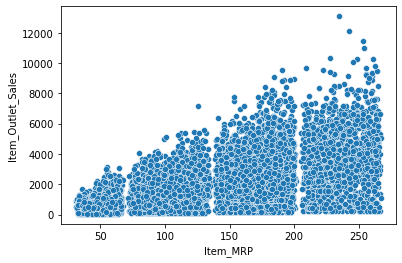

In [42]:
sns.scatterplot(x=df.loc[:, 'Item_MRP'], 
                y=df.loc[:, 'Item_Outlet_Sales'])

In [43]:
df.groupby(['Item_Identifier', 'Outlet_Identifier'])['Item_Outlet_Sales'].sum()

Item_Identifier  Outlet_Identifier
DRA12            OUT010                283.6308
                 OUT013               2552.6772
                 OUT017               2552.6772
                 OUT018                850.8924
                 OUT027                  0.0000
                                        ...    
NCZ54            OUT027               5523.4768
                 OUT035                  0.0000
                 OUT045               2274.3728
                 OUT046               4711.2008
                 OUT049               7148.0288
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

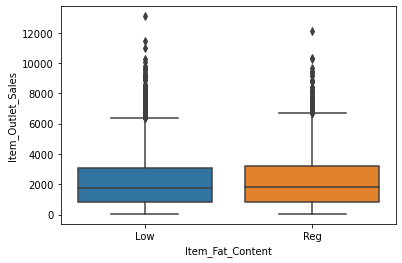

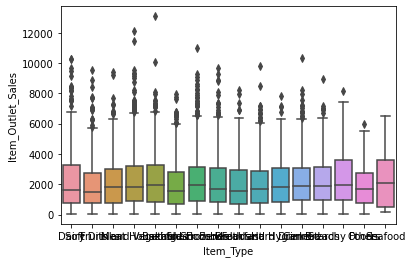

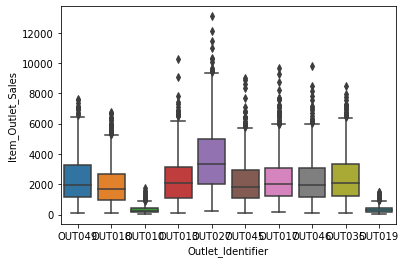

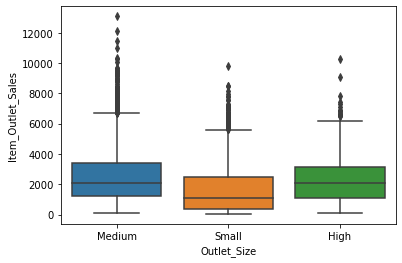

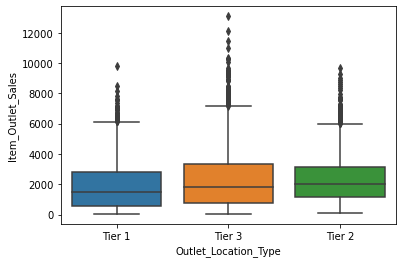

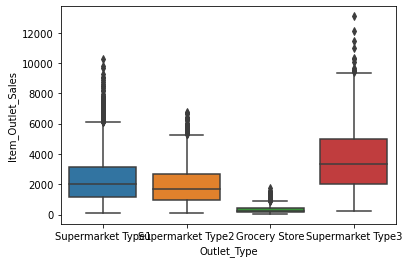

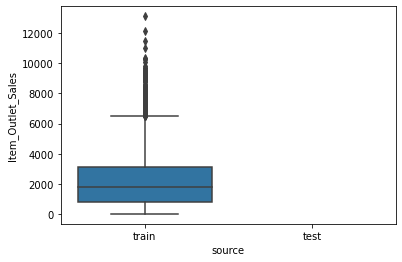

In [44]:
for column in categorical_columns:
    if column=='Item_Identifier':
        continue
    plt.figure()
    sns.boxplot(x=column, y='Item_Outlet_Sales', data=df)
plt.show()

<AxesSubplot:>

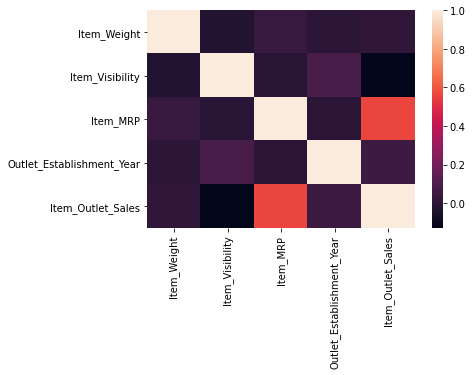

In [45]:
sns.heatmap((df[numerical_columns].corr()))

In [46]:
df.drop(['Item_Identifier', 'Outlet_Location_Type', 'Item_Fat_Content', 'Item_Weight', 'Item_Visibility', 'Item_Type']
        , axis=1, inplace=True)

In [47]:
df_dum = pd.get_dummies(df, drop_first=True)
df_dum.head()

,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,source_train
0,249.8092,20,3735.1380,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1
1,48.2692,10,443.4228,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
2,141.6180,20,2097.2700,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1
3,182.0950,21,732.3800,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,53.8614,32,994.7052,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [48]:
train_data = df_dum.loc[df_dum.source_train==1]
test_data = df_dum.loc[df_dum.source_train==0]

In [49]:
print(train_data.shape)
print(raw_train.shape)
print(test_data.shape)
print(raw_test.shape)

(8523, 18)
(8523, 13)
(5681, 18)
(5681, 12)


In [50]:
test_data = test_data.drop(['Item_Outlet_Sales', 'source_train'], axis=1)
test_data

,Item_MRP,Outlet_Establishment_Year,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,107.8622,20,0,0,0,0,0,0,0,0,1,1,0,1,0,0
1,87.3198,12,0,1,0,0,0,0,0,0,0,1,0,1,0,0
2,241.7538,21,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,155.0340,12,0,1,0,0,0,0,0,0,0,1,0,1,0,0
4,234.2300,34,0,0,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,141.3154,22,0,0,0,0,0,0,0,1,0,0,1,1,0,0
5677,169.1448,10,0,0,1,0,0,0,0,0,0,1,0,0,1,0
5678,118.7440,17,0,0,0,0,0,0,1,0,0,1,0,1,0,0
5679,214.6218,12,0,1,0,0,0,0,0,0,0,1,0,1,0,0


In [51]:
train_data = train_data.drop(['source_train'], axis=1)
train_data

,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,20,3735.1380,0,0,0,0,0,0,0,0,1,1,0,1,0,0
1,48.2692,10,443.4228,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,141.6180,20,2097.2700,0,0,0,0,0,0,0,0,1,1,0,1,0,0
3,182.0950,21,732.3800,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,53.8614,32,994.7052,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,214.5218,32,2778.3834,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8519,108.1570,17,549.2850,0,0,0,0,0,0,1,0,0,1,0,1,0,0
8520,85.1224,15,1193.1136,0,0,0,0,0,1,0,0,0,0,1,1,0,0
8521,103.1332,10,1845.5976,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [52]:
X = train_data.drop('Item_Outlet_Sales', axis=1)
y = train_data.loc[:, 'Item_Outlet_Sales']

In [53]:
print(X.shape, y.shape)

(8523, 16) (8523,)


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [55]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.5621857443814825
0.5652878846448488


In [56]:
from sklearn.metrics import mean_squared_error, r2_score

rms = mean_squared_error(y_train, reg.predict(X_train), squared=False)
r2 = r2_score(y_train, reg.predict(X_train))

In [57]:
r2

0.5621857443814825

In [58]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=8)
tree_reg.fit(X_train, y_train)
print(tree_reg.score(X_train, y_train))
print(tree_reg.score(X_test, y_test))

0.6476617707187484
0.5697735757799129


In [59]:

rms = mean_squared_error(y_train, tree_reg.predict(X_train), squared=False)
rms

1002.4875039655411

In [94]:
from sklearn.ensemble import RandomForestRegressor

rand_reg = RandomForestRegressor(n_estimators=10, max_depth=10)

rand_reg.fit(X_train, y_train)

rms_rand_train = mean_squared_error(y_train, rand_reg.predict(X_train), squared=False)
rms_rand_test = mean_squared_error(y_test, rand_reg.predict(X_test), squared=False)
r2_rand = r2_score(y_train, reg.predict(X_train))

print(rms_rand_train, rms_rand_test, r2_rand)

916.2390158537766 1153.630450594405 0.5621857443814825


In [95]:
rms_rand_train = mean_squared_error(y_train, rand_reg.predict(X_train), squared=False)
rms_rand_test = mean_squared_error(y_test, rand_reg.predict(X_test), squared=False)
r2_rand = r2_score(y_train, reg.predict(X_train))

print(rms_rand_train, rms_rand_test, r2_rand)

916.2390158537766 1153.630450594405 0.5621857443814825


In [96]:
pred = rand_reg.predict(test_data)

In [98]:
raw_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,test
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,test
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,test
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,test


In [99]:
submission = pd.DataFrame({'Item_Identifier': raw_test['Item_Identifier'], 
                'Outlet_Identifier': raw_test['Outlet_Identifier'],
                'Item_Outlet_Sales': pred})

In [100]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1439.555603
1,FDW14,OUT017,1157.207143
2,NCN55,OUT010,501.523114
3,FDQ58,OUT017,2401.973713
4,FDY38,OUT027,6375.080871
...,...,...,...
5676,FDB58,OUT046,2249.997818
5677,FDD47,OUT018,2046.903385
5678,NCO17,OUT045,1314.527762
5679,FDJ26,OUT017,4130.942499


In [101]:
submission.to_csv('submission.csv')